<a href="https://colab.research.google.com/github/marielaloncha-pampa/Business-Analytics-Optimizaci-n-Operativa-para-Bodega/blob/main/an%C3%A1lisis_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Análisis de Datos para el sector Vitivinícola - Caso Bodega Mendoza
**Desarrollado por:** Mariela Loncharich  
**Alcance:** Álgebra Matricial y Optimización Lineal.

#  1. Performance de Ventas y Estacionalidad
En esta sección se modela el comportamiento histórico de las ventas anuales de la bodega. El análisis permite:
* **Identificar hitos operativos:** Detectar automáticamente los picos de demanda (Vendimia en Marzo y temporada invernal en Julio).
* **Gestión de Stock:** Entender la variabilidad mensual para optimizar la logística y el personal eventual.

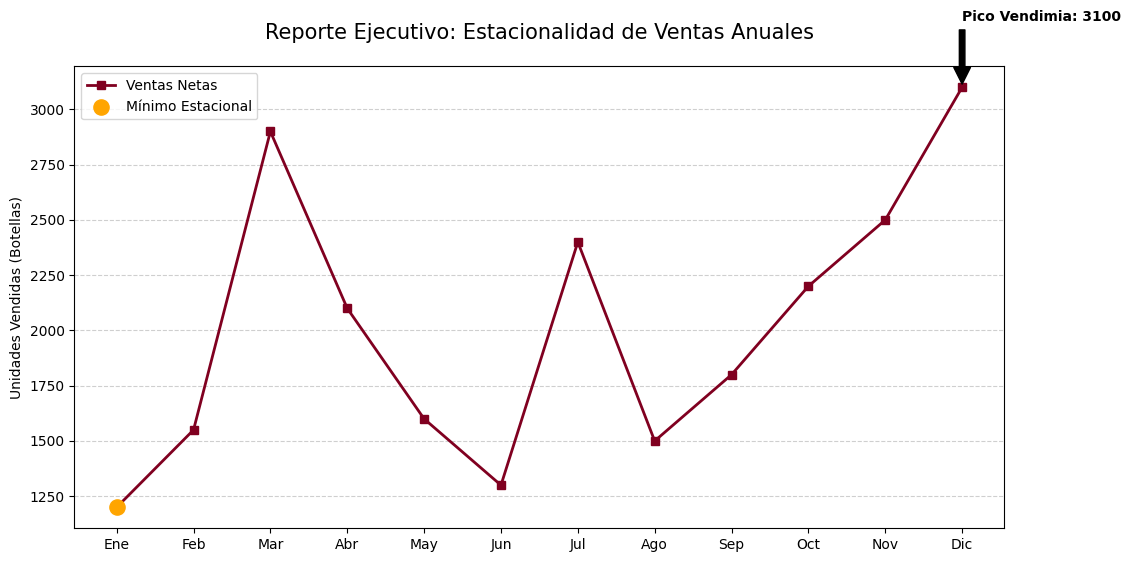

--- RESUMEN FINANCIERO ---
Facturación Proyectada Mercado Interno: $12,570,000.00
Facturación Proyectada Exportación: $16,160,000.00


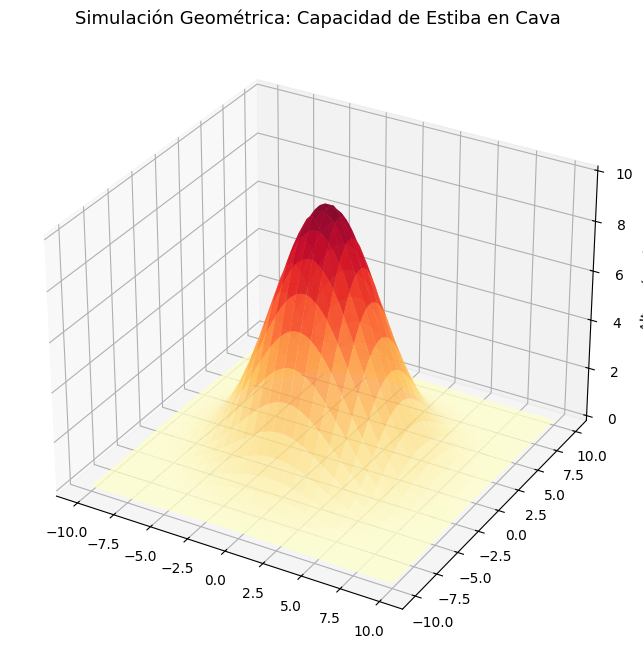

<Figure size 640x480 with 0 Axes>

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. PERFORMANCE DE VENTAS ANUALES (Indicadores de Gestión) ---
# Datos reales: Pico en Marzo (Vendimia) y Julio (Turismo de invierno)
meses = np.array(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ventas = np.array([1200, 1550, 2900, 2100, 1600, 1300, 2400, 1500, 1800, 2200, 2500, 3100])

# Detección de Hitos Operativos (Máximos y Mínimos)
idx_max = np.argmax(ventas)
idx_min = np.argmin(ventas)

plt.figure(figsize=(12, 6))
plt.plot(meses, ventas, marker='s', linestyle='-', color='#800020', linewidth=2, label='Ventas Netas') # Color Malbec

# Resaltar Picos de Demanda
plt.annotate(f'Pico Vendimia: {ventas[idx_max]}', xy=(meses[idx_max], ventas[idx_max]),
             xytext=(meses[idx_max], ventas[idx_max]+300),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, fontweight='bold')

plt.scatter(meses[idx_min], ventas[idx_min], color='orange', s=120, label='Mínimo Estacional', zorder=5)

plt.title('Reporte Ejecutivo: Estacionalidad de Ventas Anuales', fontsize=15, pad=20)
plt.ylabel('Unidades Vendidas (Botellas)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.show()

# --- 2. ANÁLISIS DE RENTABILIDAD POR CANAL (Álgebra Lineal) ---
# Precios promedio por línea: [Entry Level, Reserva, Gran Reserva]
precios = np.array([2500, 5800, 12000])
# Matriz: Filas (Líneas de vino) x Columnas (Mercado Interno, Exportación)
distribucion_unidades = np.array([
    [1500, 800],  # Entry Level
    [900, 1200],  # Reserva
    [300, 600]    # Gran Reserva
])

# Cálculo de facturación total por canal mediante producto punto
facturacion = np.dot(precios, distribucion_unidades)

print(f"--- RESUMEN FINANCIERO ---")
print(f"Facturación Proyectada Mercado Interno: ${facturacion[0]:,.2f}")
print(f"Facturación Proyectada Exportación: ${facturacion[1]:,.2f}")

# --- 3. OPTIMIZACIÓN DE ESPACIO EN CAVA (Modelado 3D) ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Simulación de la bóveda de estiba para cálculo volumétrico
x = np.linspace(-10, 10, 60)
y = np.linspace(-10, 10, 60)
X, Y = np.meshgrid(x, y)
Z = np.exp(-0.05 * (X**2 + Y**2)) * 10 # Simulación de domo de almacenamiento

surf = ax.plot_surface(X, Y, Z, cmap='YlOrRd', edgecolor='none', alpha=0.8)
ax.set_title('Simulación Geométrica: Capacidad de Estiba en Cava', fontsize=13)
ax.set_zlabel('Altura (mts)')
plt.show()

plt.tight_layout()
plt.show()
# Agrega un print vacío para generar un salto de línea en el reporte
print("\n" * 2)

#  2. Optimización del Mix de Producción
En esta fase, el análisis pasa de ser **descriptivo** a **prescriptivo**. Utilizamos modelos de **Investigación Operativa** para resolver el desafío de la escasez de recursos.

### Problema
La bodega cuenta con una cantidad limitada de materia prima (**900.000 kg de uva**) y debe decidir cómo distribuirla entre dos varietales (**Malbec y Cabernet**) para maximizar la rentabilidad total.

### Metodología
* **Programación Lineal (Librería PuLP):** Para encontrar la solución exacta que respete todas las restricciones técnicas e insumos.
* **Visualización de Superficies 3D:** Representación geométrica de la función de ganancia, permitiendo identificar visualmente el **"Punto Óptimo"** de producción.
* **Análisis de Margen:** Evaluación de la contribución unitaria para priorizar la línea de mayor impacto financiero.

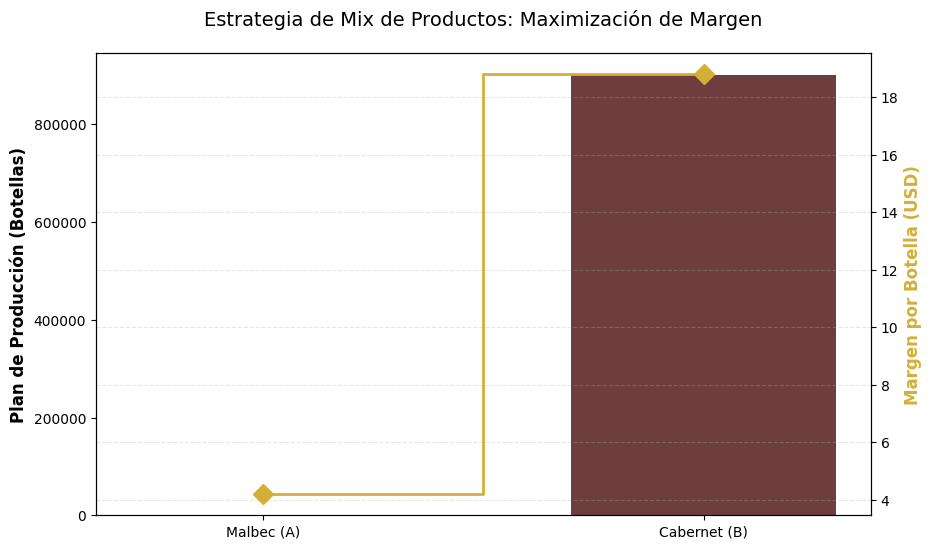

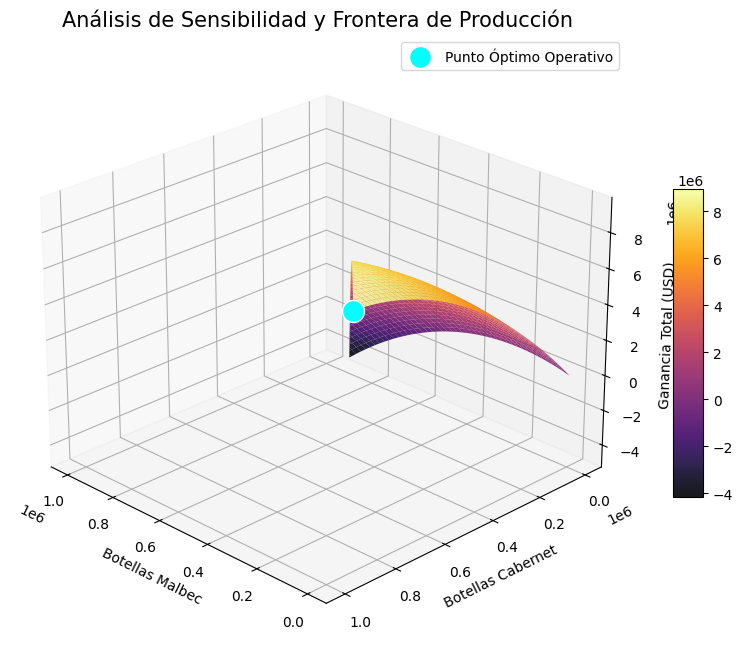

--- RESULTADO DE CONSULTORÍA ---
Estado del Sistema: Optimal
Maximización de Beneficios: $16,920,000.00


<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
from mpl_toolkits.mplot3d import Axes3D

# 1. MOTOR DE OPTIMIZACIÓN (PuLP) - Lógica de Negocio
# -------------------------------------------------------------------
modelo = LpProblem("Maximizacion_Beneficios_Bodega", LpMaximize)

# Variables de decisión: Cantidad de botellas a producir
A = LpVariable("Malbec_Premium", lowBound=0)
B = LpVariable("Cabernet_Reserva", lowBound=0)

# Parámetros económicos (Márgenes reales calculados)
margen_A = 4.2   # Ingreso Neto Malbec
margen_B = 18.8  # Ingreso Neto Cabernet

# Función Objetivo: Maximizar el margen total
modelo += margen_A * A + margen_B * B, "Margen_Total"

# Restricciones de Insumos Críticos
modelo += 0.8 * A + 0.3 * B <= 500000, "Insumo_Seco_1"
modelo += 0.5 * A + 0.4 * B <= 900000, "Insumo_Seco_2"
modelo += 1.0 * A + 1.0 * B <= 900000, "Uva_Propia_KG"

# Resolver el modelo
modelo.solve()

# 2. VISUALIZACIÓN 1: COMPARATIVA DE PRODUCCIÓN VS MÁRGENES
# -------------------------------------------------------------------
vinos = ['Malbec (A)', 'Cabernet (B)']
produccion = [value(A), value(B)]
m_unitarios = [margen_A, margen_B]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para la producción óptima
colores = ['#800020', '#4A0E0E'] # Borravino y Tinto profundo
bars = ax1.bar(vinos, produccion, color=colores, alpha=0.8, width=0.6)
ax1.set_ylabel('Plan de Producción (Botellas)', fontsize=12, fontweight='bold')
ax1.set_title('Estrategia de Mix de Productos: Maximización de Margen', fontsize=14, pad=20)

# Eje secundario para los márgenes unitarios
ax2 = ax1.twinx()
ax2.step(vinos, m_unitarios, color='#D4AF37', where='mid', marker='D', markersize=10, linewidth=2, label='Margen USD')
ax2.set_ylabel('Margen por Botella (USD)', color='#D4AF37', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 3. VISUALIZACIÓN 2: SUPERFICIE DE GANANCIA 3D
# -------------------------------------------------------------------
def f_ganancia(x, y):
    # Función de beneficio combinando márgenes y costos de escala
    return margen_A*x + margen_B*y - 0.00001*(x**2 + y**2)

x_range = np.linspace(0, 1000000, 100)
y_range = np.linspace(0, 1000000, 100)
X, Y = np.meshgrid(x_range, y_range)

# Aplicar la restricción física de la uva como máscara
Z = np.where(X + Y <= 900000, f_ganancia(X, Y), np.nan)

fig3d = plt.figure(figsize=(12, 8))
ax3d = fig3d.add_subplot(111, projection='3d')
surf = ax3d.plot_surface(X, Y, Z, cmap='inferno', edgecolor='none', alpha=0.9)

# Resaltar el Punto Óptimo calculado por PuLP
z_optimo = f_ganancia(value(A), value(B))
ax3d.scatter(value(A), value(B), z_optimo, color='cyan', s=250, edgecolors='white', label='Punto Óptimo Operativo')

ax3d.set_xlabel('Botellas Malbec')
ax3d.set_ylabel('Botellas Cabernet')
ax3d.set_zlabel('Ganancia Total (USD)')
ax3d.set_title('Análisis de Sensibilidad y Frontera de Producción', fontsize=15)
ax3d.view_init(elev=25, azim=135) # Mejor ángulo para ver la restricción
plt.colorbar(surf, shrink=0.5, aspect=10)
plt.legend()
plt.show()

print(f"--- RESULTADO DE CONSULTORÍA ---")
print(f"Estado del Sistema: {LpStatus[modelo.status]}")
print(f"Maximización de Beneficios: ${value(modelo.objective):,.2f}")

plt.tight_layout()
plt.show()
# Agrega un print vacío para generar un salto de línea en el reporte
print("\n" * 2)

# Conclusión: Integración de Resultados y Visión Estratégica

El presente análisis técnico permite concluir que la gestión de una bodega moderna debe ser abordada desde dos dimensiones complementarias:

1. **Dimensión Comercial:** El reporte identifica una estacionalidad marcada con picos en **Marzo (Vendimia)** y **Diciembre**. Esta fluctuación exige una planificación logística diferenciada para los periodos de alta demanda.
2. **Dimensión Operativa:** El modelo de programación lineal determinó que la estrategia óptima para maximizar beneficios consiste en priorizar la producción de **Cabernet Reserva**, alcanzando un margen total de **$16.920.000,00 USD**.

---

# Conclusion: Integration of Results and Strategic Vision

This technical analysis demonstrates that modern winery management must be approached from two complementary dimensions:

1. **Commercial Dimension:** The report identifies a clear seasonality with demand peaks in **March (Harvest Season)** and **December**. This fluctuation requires differentiated logistics planning to handle high-demand periods effectively.
2. **Operational Dimension:** The linear programming model determined that the optimal decision to maximize profit is to prioritize **Cabernet Reserva** production, achieving a total margin of **$16,920,000.00 USD**.

---
